# Factors affecting US housing prices

## Problem Statement
Find publicly available data for key national factors that influence US home prices. (For example, the US unemployment rate is a national factor, while California unemployment rate isn’t.) Then, build a data science model that explains how these factors impacted home prices over the last 20 years. Use the S&P Case-Schiller Home Price Index as a proxy for home prices:
http://fred.stlouisfed.org/series/CSUSHPISA

The key national factors considered in this problem are 
- Gross Domestic Product (GDP)
- Unemployment Rate 
- Interest Rate
- Government Subsidies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
data = pd.read_csv('CSUSHPISA.csv')
data = data.rename(columns={'CSUSHPISA':'Housing_Prices'})
data

,DATE,Housing_Prices
0,1987-01-01,63.962
1,1987-02-01,64.422
2,1987-03-01,64.733
3,1987-04-01,65.129
4,1987-05-01,65.563
...,...,...
415,2021-08-01,267.183
416,2021-09-01,270.225
417,2021-10-01,272.976
418,2021-11-01,276.189


In [3]:
years = list(map(str, range(1987, 2021)))
X = data['DATE']
d = data['Housing_Prices']
data.describe()

,Housing_Prices
count,420.000000
mean,133.985460
std,51.064458
min,63.962000
25%,81.437000
50%,138.975500
75%,173.311000
max,279.801000


# 1. GDP 
dataset - https://fred.stlouisfed.org/series/A191RP1Q027SBEA

In [4]:
gdp = pd.read_csv('GDP.csv')
gdp

,DATE,A191RP1Q027SBEA
0,1947-04-01,4.7
1,1947-07-01,6.0
2,1947-10-01,17.3
3,1948-01-01,9.6
4,1948-04-01,10.7
...,...,...
294,2020-10-01,6.6
295,2021-01-01,10.9
296,2021-04-01,13.4
297,2021-07-01,8.4


In [5]:
gdp.DATE[159]

'1987-01-01'

In [6]:
gdp = gdp.iloc[159:,:]
gdp = gdp.rename(columns={'A191RP1Q027SBEA':'GDP'}) 
gdp

,DATE,GDP
159,1987-01-01,5.7
160,1987-04-01,7.3
161,1987-07-01,6.7
162,1987-10-01,10.5
163,1988-01-01,5.3
...,...,...
294,2020-10-01,6.6
295,2021-01-01,10.9
296,2021-04-01,13.4
297,2021-07-01,8.4


In [7]:
result1 = pd.merge(data, gdp, left_on='DATE', right_on='DATE', how='left')
result1

,DATE,Housing_Prices,GDP
0,1987-01-01,63.962,5.7
1,1987-02-01,64.422,NaN
2,1987-03-01,64.733,NaN
3,1987-04-01,65.129,7.3
4,1987-05-01,65.563,NaN
...,...,...,...
415,2021-08-01,267.183,NaN
416,2021-09-01,270.225,NaN
417,2021-10-01,272.976,14.6
418,2021-11-01,276.189,NaN


In [8]:
result1.corr()

,Housing_Prices,GDP
Housing_Prices,1.000000,-0.051352
GDP,-0.051352,1.000000


In [9]:
d1 = result1['Housing_Prices']
a = result1['GDP']

result1['GDP'] = result1['GDP'].fillna(result1['GDP'].mean())
result1

,DATE,Housing_Prices,GDP
0,1987-01-01,63.962,5.700000
1,1987-02-01,64.422,4.930714
2,1987-03-01,64.733,4.930714
3,1987-04-01,65.129,7.300000
4,1987-05-01,65.563,4.930714
...,...,...,...
415,2021-08-01,267.183,4.930714
416,2021-09-01,270.225,4.930714
417,2021-10-01,272.976,14.600000
418,2021-11-01,276.189,4.930714


In [10]:
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(d1, a)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=5.16+-0.00x, r=-0.03'

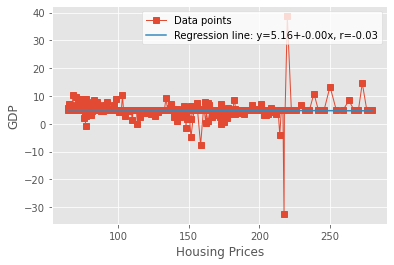

In [11]:
fig, ax = plt.subplots()
ax.plot(d1, a, linewidth=1, marker='s', label='Data points')
ax.plot(d1, intercept + slope * d1, label=line)
ax.set_xlabel('Housing Prices')
ax.set_ylabel('GDP')
ax.legend(facecolor='white')
plt.show()

The Pearson correlation coefficient (or Pearson's r) of this relation is **-0.03**, which indicates that negative correlation between the two variables, but almost close to zero (no relation at all) - Housing prices and GDP. 

Negative correlation means one variable increases as the other decreases. In this case, with decrease in GDP, housing prices increase and vice versa, but the effect is not that significant.

# 2. Unemployment Rate
dataset - https://fred.stlouisfed.org/series/LNS14000024

In [12]:
unem = pd.read_csv('Unemployment Rate.csv')
unem

,DATE,LNS14000024
0,1948-01-01,3.0
1,1948-02-01,3.3
2,1948-03-01,3.5
3,1948-04-01,3.5
4,1948-05-01,3.3
...,...,...
885,2021-10-01,4.3
886,2021-11-01,3.9
887,2021-12-01,3.6
888,2022-01-01,3.7


In [13]:
unem.DATE[468]

'1987-01-01'

In [14]:
unem = unem.iloc[468:888,:]
unem = unem.rename(columns={'LNS14000024':'Unemployment_rate'})
unem

,DATE,Unemployment_rate
468,1987-01-01,5.9
469,1987-02-01,5.8
470,1987-03-01,5.8
471,1987-04-01,5.5
472,1987-05-01,5.5
...,...,...
883,2021-08-01,4.9
884,2021-09-01,4.5
885,2021-10-01,4.3
886,2021-11-01,3.9


In [15]:
result2 = pd.merge(data, unem , left_on='DATE', right_on='DATE', how='left')
result2

,DATE,Housing_Prices,Unemployment_rate
0,1987-01-01,63.962,5.9
1,1987-02-01,64.422,5.8
2,1987-03-01,64.733,5.8
3,1987-04-01,65.129,5.5
4,1987-05-01,65.563,5.5
...,...,...,...
415,2021-08-01,267.183,4.9
416,2021-09-01,270.225,4.5
417,2021-10-01,272.976,4.3
418,2021-11-01,276.189,3.9


In [16]:
result2.corr()

,Housing_Prices,Unemployment_rate
Housing_Prices,1.000000,-0.010112
Unemployment_rate,-0.010112,1.000000


In [17]:
d2 = result2.Housing_Prices
b = result2.Unemployment_rate

In [18]:
slope, intercept, r, p, stderr = scipy.stats.linregress(d2, b)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=5.34+-0.00x, r=-0.01'

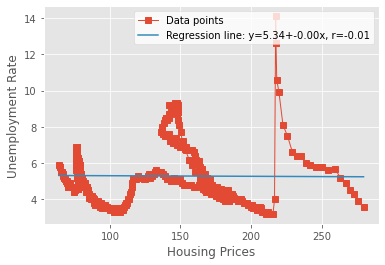

In [19]:
fig, ax = plt.subplots()
ax.plot(d2, b, linewidth=1, marker='s', label='Data points')
ax.plot(d2, intercept + slope * d2, label=line)
ax.set_xlabel('Housing Prices')
ax.set_ylabel('Unemployment Rate')
ax.legend(facecolor='white')
plt.show()

The Pearson correlation coefficient (or Pearson's r) of this relation is **-0.01**, which indicates that negative correlation (almost no linear relationship) between the two variables- Housing prices and Unemployment Rate.

A value of zero indicates that there is no relationship between the two variables. As the value we got is close to zero, but on the negative side, it has a bit of negative relationship. This proves that unemployment rate doesn't have much effect on the housing prices.

# 3. Interest Rates
dataset - https://fred.stlouisfed.org/series/INTDSRUSM193N

In [20]:
ir = pd.read_csv('Interest Rate.csv')
ir

,DATE,INTDSRUSM193N
0,1950-01-01,1.50
1,1950-02-01,1.50
2,1950-03-01,1.50
3,1950-04-01,1.50
4,1950-05-01,1.50
...,...,...
855,2021-04-01,0.25
856,2021-05-01,0.25
857,2021-06-01,0.25
858,2021-07-01,0.25


In [21]:
ir.DATE[444]

'1987-01-01'

In [22]:
ir = ir.iloc[444:,:]
ir = ir.rename(columns={'INTDSRUSM193N':'Interest_rate'})
ir

,DATE,Interest_rate
444,1987-01-01,5.50
445,1987-02-01,5.50
446,1987-03-01,5.50
447,1987-04-01,5.50
448,1987-05-01,5.50
...,...,...
855,2021-04-01,0.25
856,2021-05-01,0.25
857,2021-06-01,0.25
858,2021-07-01,0.25


In [23]:
result3 = pd.merge(data, ir, left_on='DATE', right_on='DATE', how='left')
result3

,DATE,Housing_Prices,Interest_rate
0,1987-01-01,63.962,5.50
1,1987-02-01,64.422,5.50
2,1987-03-01,64.733,5.50
3,1987-04-01,65.129,5.50
4,1987-05-01,65.563,5.50
...,...,...,...
415,2021-08-01,267.183,0.25
416,2021-09-01,270.225,NaN
417,2021-10-01,272.976,NaN
418,2021-11-01,276.189,NaN


In [24]:
result3.corr()

,Housing_Prices,Interest_rate
Housing_Prices,1.00000,-0.59253
Interest_rate,-0.59253,1.00000


In [25]:
d3 = result3['Housing_Prices']
c = result3['Interest_rate']

result3['Interest_rate'] = result3['Interest_rate'].fillna(0.25)
result3

,DATE,Housing_Prices,Interest_rate
0,1987-01-01,63.962,5.50
1,1987-02-01,64.422,5.50
2,1987-03-01,64.733,5.50
3,1987-04-01,65.129,5.50
4,1987-05-01,65.563,5.50
...,...,...,...
415,2021-08-01,267.183,0.25
416,2021-09-01,270.225,0.25
417,2021-10-01,272.976,0.25
418,2021-11-01,276.189,0.25


In [26]:
slope, intercept, r, p, stderr = scipy.stats.linregress(d3, c)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=6.65+-0.03x, r=-0.60'

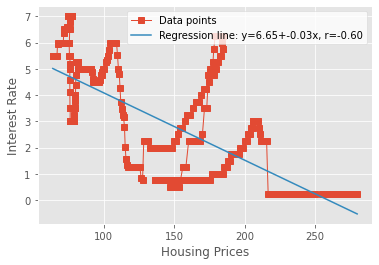

In [27]:
fig, ax = plt.subplots()
ax.plot(d3, c, linewidth=1, marker='s', label='Data points')
ax.plot(d3, intercept + slope * d3, label=line)
ax.set_xlabel('Housing Prices')
ax.set_ylabel('Interest Rate')
ax.legend(facecolor='white')
plt.show()

The Pearson correlation coefficient (or Pearson's r) of this relation is **-0.60**, which indicates that negative correlation between the two variables - Housing prices and Interest Rate.

Negative correlation means one variable increases as the other decreases. In this case, with increase in interest rates for housing loans, people are hesitant to spend on houses as it is a financial burden for them. Thus, it decreases the supply for houses which results in the drop in prices.

# 4. Government Subsidies
dataset - https://fred.stlouisfed.org/series/L312051A027NBEA

In [28]:
gs = pd.read_csv('Government Subsidies.csv')
gs

,DATE,L312051A027NBEA
0,1960-01-01,0.146
1,1961-01-01,0.159
2,1962-01-01,0.176
3,1963-01-01,0.195
4,1964-01-01,0.210
...,...,...
56,2016-01-01,37.550
57,2017-01-01,35.771
58,2018-01-01,38.859
59,2019-01-01,40.185


In [29]:
gs.DATE[27]

'1987-01-01'

In [30]:
gs = gs.iloc[27:,:]
gs = gs.rename(columns={'L312051A027NBEA':'Government_Subsidies'})
gs

,DATE,Government_Subsidies
27,1987-01-01,11.506
28,1988-01-01,12.743
29,1989-01-01,14.215
30,1990-01-01,15.487
31,1991-01-01,17.055
32,1992-01-01,18.420
33,1993-01-01,20.607
34,1994-01-01,21.764
35,1995-01-01,24.396
36,1996-01-01,25.075


In [31]:
result4 = pd.merge(gs, data, left_on='DATE', right_on='DATE', how='left')
result4

,DATE,Government_Subsidies,Housing_Prices
0,1987-01-01,11.506,63.962
1,1988-01-01,12.743,68.856
2,1989-01-01,14.215,73.946
3,1990-01-01,15.487,76.897
4,1991-01-01,17.055,75.913
5,1992-01-01,18.420,76.085
6,1993-01-01,20.607,76.783
7,1994-01-01,21.764,78.590
8,1995-01-01,24.396,80.425
9,1996-01-01,25.075,81.833


In [32]:
result4.corr()

,Government_Subsidies,Housing_Prices
Government_Subsidies,1.000000,0.905012
Housing_Prices,0.905012,1.000000


In [33]:
d4 = result4['Housing_Prices']
d = result4['Government_Subsidies']

In [34]:
slope, intercept, r, p, stderr = scipy.stats.linregress(d4, d)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=6.19+0.16x, r=0.91'

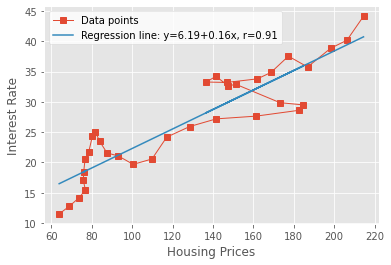

In [35]:
fig, ax = plt.subplots()
ax.plot(d4, d, linewidth=1, marker='s', label='Data points')
ax.plot(d4, intercept + slope * d4, label=line)
ax.set_xlabel('Housing Prices')
ax.set_ylabel('Interest Rate')
ax.legend(facecolor='white')
plt.show()

The Pearson correlation coefficient (or Pearson's r) of this relation is **0.91**, which indicates that there exists a postive correlation between the two variables - Housing prices and Government Subsidies.

A positive correlation is a relationship between two variables that tend to move in the same direction. A positive correlation exists when one variable tends to decrease as the other variable decreases, or one variable tends to increase when the other increases. In this case, with increase in government subsidies, people are more interested in investing in houses as they have some financial support. This increases the demand of houses which in turn results in increase in housing prices.

# The End.